<h1>Proyecto Final de Ciencia de Datos en Python - Primer Trimestre </h1>
<ul>
    <li>Nombre: Huber Torres Lemus</li>
    <li>Carnet: 22000782</li>
</ul>

<h5>Declaracion de librerias</h5>

In [203]:
import numpy as np
import pandas as pd
import sklearn
# graficas
import seaborn as sns 
import matplotlib.pyplot as plt


<h5>Carga de data</h5>

In [40]:
data = np.load('data/proyecto_training_data.npy', mmap_mode='r')

fields = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df_data = pd.DataFrame(data, columns = fields)
df_data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


<ul>
    <li>entrenamiento(80%)</li>
    <li>validación y pruebas(20%)</li>
<ul>

In [42]:
mask = int(0.8 * len(data))
training_data = data[:mask]
test_data = data[mask:]

df_training, df_test = pd.DataFrame(training_data, columns = fields), pd.DataFrame(test_data, columns = fields)

print(f"No. datos training: {training_data.shape[0]}")
print(f"No. datos test: {testing_data.shape[0]}")

No. datos training: 1168
No. datos test: 306


<h5>Analisis exploratorio de datos</h5>

In [43]:
df_training.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


<h5>Peak to Peak</h5>

In [57]:
peak2Peak_training = np.ptp(df_training, axis=0)
df_peak2Peak_training = pd.DataFrame(peak2Peak_training)
df_peak2Peak_training = df_peak2Peak_training.T
df_peak2Peak_training.columns = fields
df_peak2Peak_training

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,720100.0,9.0,2894.0,12.0,135.0,NaN


In [45]:
df_test.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,239.000000
mean,182244.869863,6.092466,1187.839041,6.647260,1970.534247,70.464435
std,82026.898202,1.405076,433.843272,1.685462,31.229373,27.341710
min,52500.000000,3.000000,483.000000,3.000000,1872.000000,21.000000
25%,130000.000000,5.000000,881.250000,6.000000,1950.000000,59.500000
50%,163500.000000,6.000000,1106.000000,6.000000,1971.500000,67.000000
75%,214250.000000,7.000000,1407.750000,8.000000,2001.000000,80.000000
max,745000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


In [105]:
peak2Peak_test = np.ptp(df_test, axis=0)
df_peak2Peak_test = pd.DataFrame(peak2Peak_test)
df_peak2Peak_test = df_peak2Peak_test.T
df_peak2Peak_test.columns = fields
df_peak2Peak_test

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,692500.0,7.0,4209.0,9.0,137.0,NaN


<h5>Histogramas</h5>

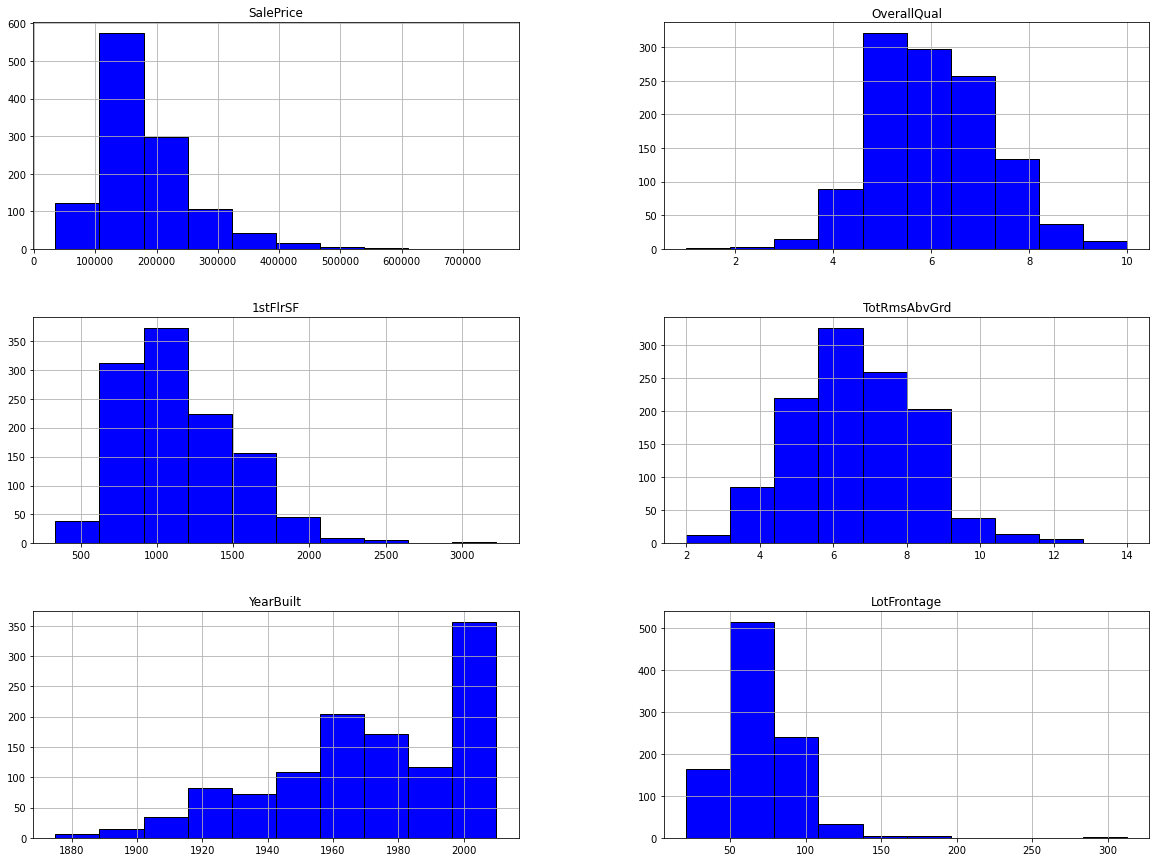

In [112]:
df_training.hist(edgecolor="black", color="blue",figsize=(20,15))
plt.show()

<h5>Correlaciones</h5>

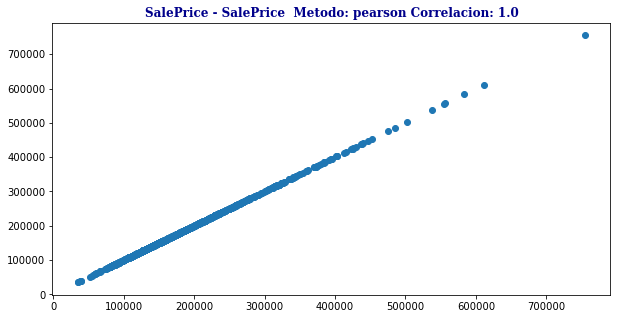

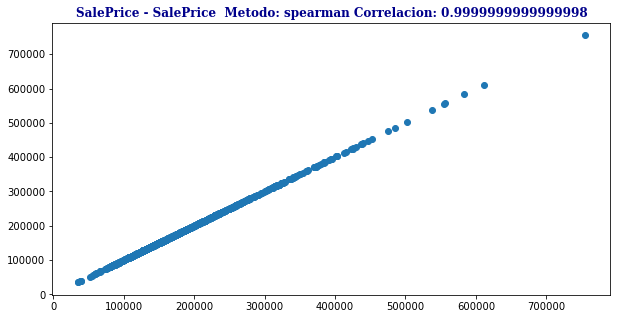

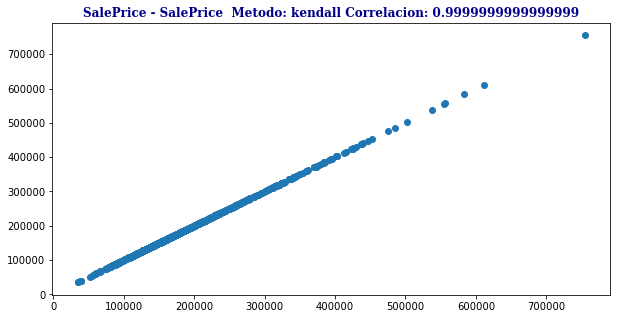

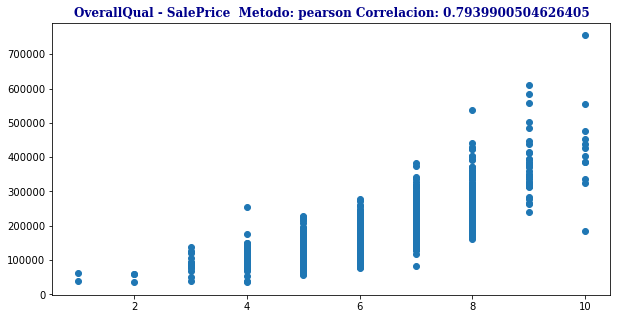

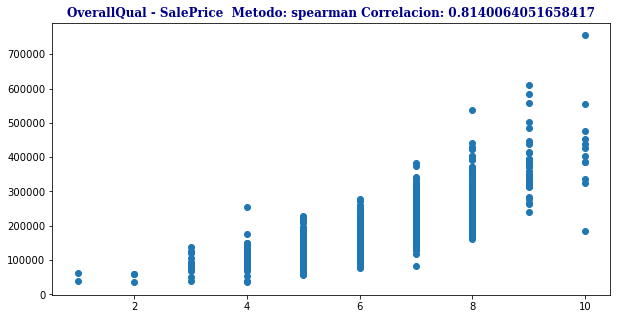

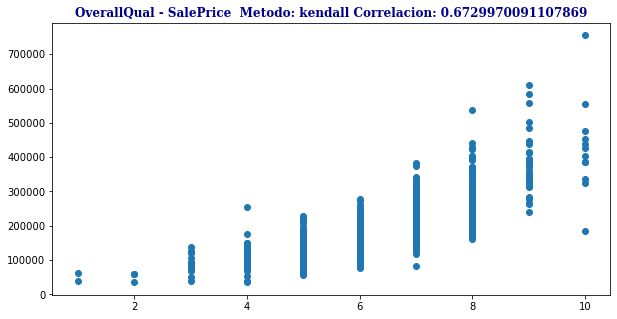

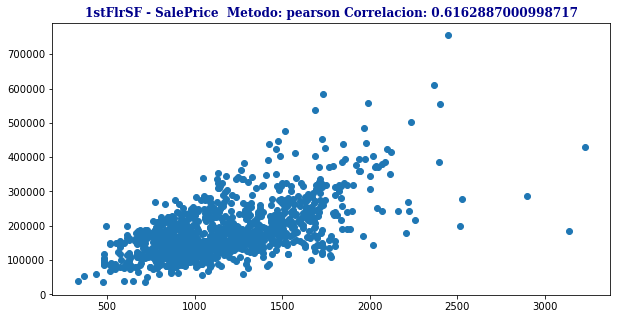

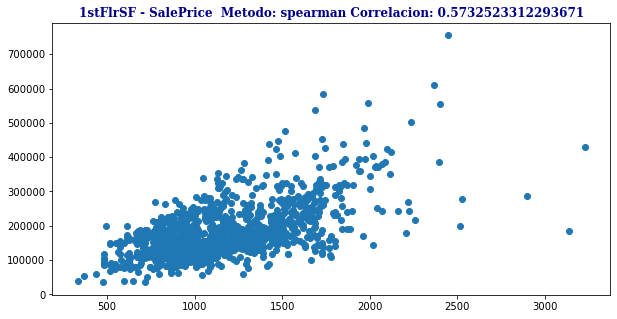

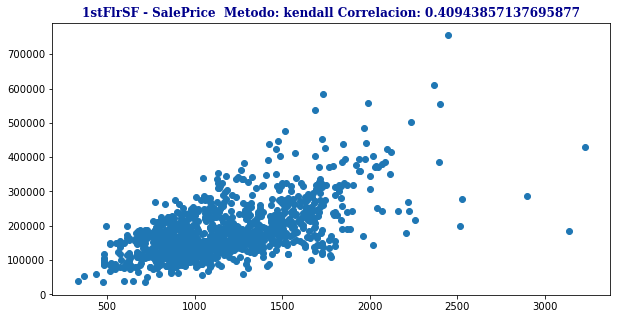

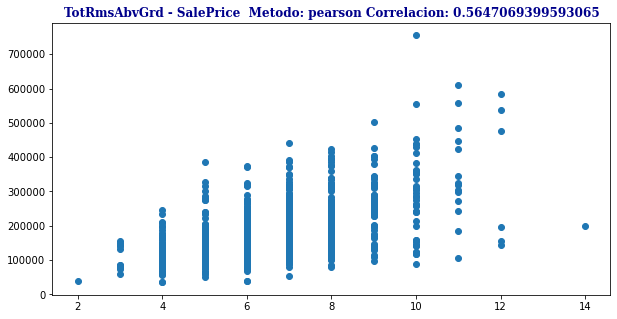

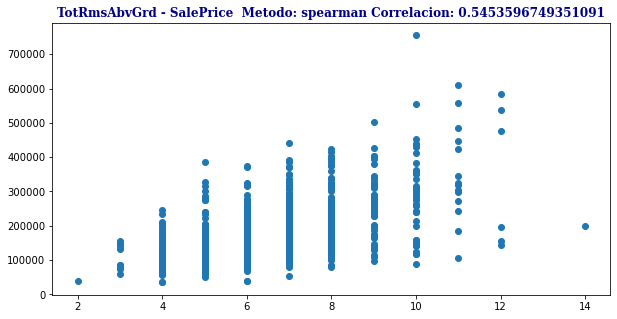

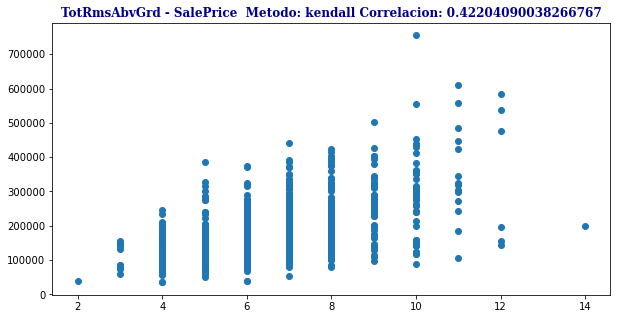

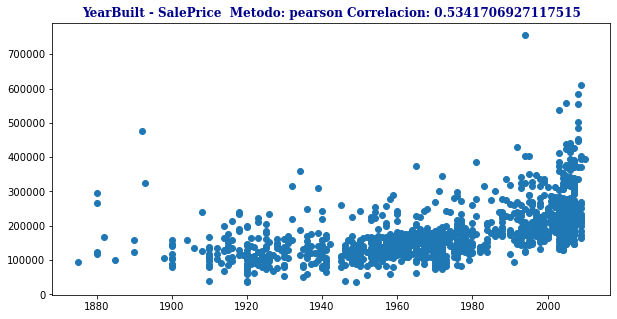

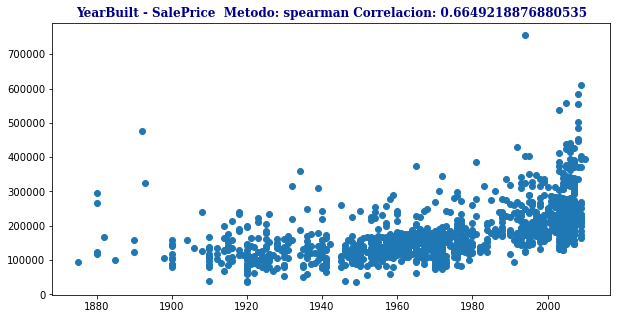

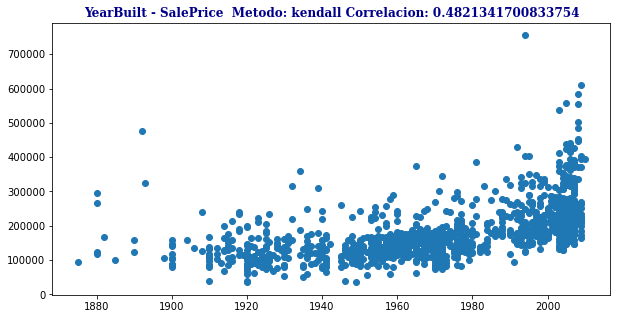

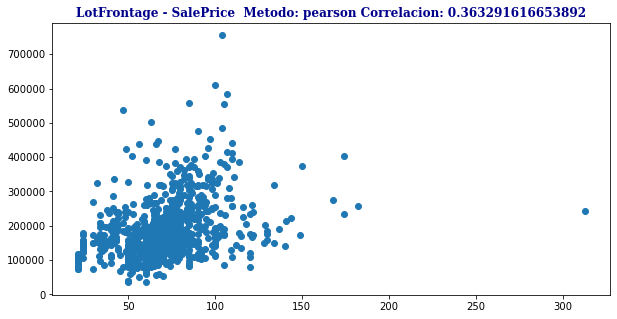

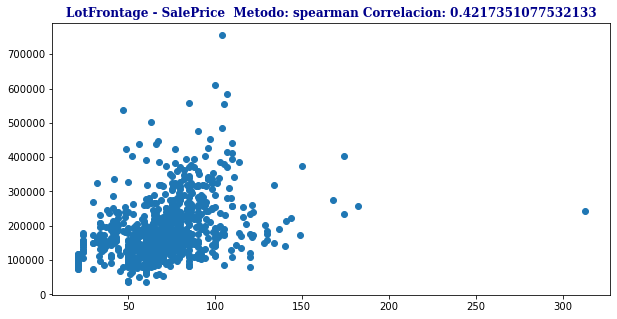

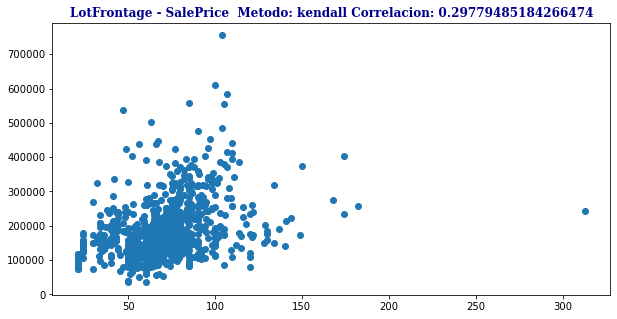

In [167]:
# def coeficiente_correlacion()
methods = ['pearson', 'spearman', 'kendall']
correlaciones = [[],[],[],[]]
cont = 0
for variable_x in fields:
    for m in methods:
        correlacion = df_training[variable_x].corr(df_training['SalePrice'], method=m)
        plt.figure(figsize = (10,5))
        plt.scatter(data = df_training, x = variable_x, y = 'SalePrice')
        plt.title(str(variable_x) + " - SalePrice  Metodo: " +str(m) + " Correlacion: " + str(correlacion) , 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 12})
        correlaciones[cont].append([variable_x,'SalePrice',m,correlacion])
        
        



# print('spearman: ', df_training['OverallQual'].corr(df_training['SalePrice'], method='spearman'))
# print(' kendall: ', df_training['OverallQual'].corr(df_training['SalePrice'], method='kendall'))

# print('Pearson: ', df_training['OverallQual'].corr(df_training['SalePrice'], method='pearson'))
# print('spearman: ', df_training['OverallQual'].corr(df_training['SalePrice'], method='spearman'))
# print('kendall: ', df_training['OverallQual'].corr(df_training['SalePrice'], method='kendall'))

In [182]:
correlaciones
df_correlaciones = pd.DataFrame(correlaciones[0], columns=['var x', 'var y', 'metodo', 'puntuacion'])
df_correlaciones

,var x,var y,metodo,puntuacion
0,SalePrice,SalePrice,pearson,1.000000
1,SalePrice,SalePrice,spearman,1.000000
2,SalePrice,SalePrice,kendall,1.000000
3,OverallQual,SalePrice,pearson,0.793990
4,OverallQual,SalePrice,spearman,0.814006
5,OverallQual,SalePrice,kendall,0.672997
6,1stFlrSF,SalePrice,pearson,0.616289
7,1stFlrSF,SalePrice,spearman,0.573252
8,1stFlrSF,SalePrice,kendall,0.409439
9,TotRmsAbvGrd,SalePrice,pearson,0.564707


In [187]:
# Los mejores dos correlaciones del metodo pearson
df_correlaciones_pearson = df_correlaciones[df_correlaciones['metodo'] == 'pearson']
df_correlaciones_pearson = df_correlaciones_pearson[df_correlaciones_pearson['var x'] != 'SalePrice']
df_correlaciones_pearson.sort_values(by="puntuacion", ascending=False).head(2)

,var x,var y,metodo,puntuacion
3,OverallQual,SalePrice,pearson,0.793990
6,1stFlrSF,SalePrice,pearson,0.616289


In [188]:
# Los mejores dos correlaciones del metodo spearman
df_correlaciones_spearman = df_correlaciones[df_correlaciones['metodo'] == 'spearman']
df_correlaciones_spearman = df_correlaciones_spearman[df_correlaciones_spearman['var x'] != 'SalePrice']
df_correlaciones_spearman.sort_values(by="puntuacion", ascending=False).head(2)

,var x,var y,metodo,puntuacion
4,OverallQual,SalePrice,spearman,0.814006
13,YearBuilt,SalePrice,spearman,0.664922


In [189]:
# Los mejores dos correlaciones del metodo kendall
df_correlaciones_kendall = df_correlaciones[df_correlaciones['metodo'] == 'kendall']
df_correlaciones_kendall = df_correlaciones_kendall[df_correlaciones_kendall['var x'] != 'SalePrice']
df_correlaciones_kendall.sort_values(by="puntuacion", ascending=False).head(2)

,var x,var y,metodo,puntuacion
5,OverallQual,SalePrice,kendall,0.672997
14,YearBuilt,SalePrice,kendall,0.482134


<h3>Las mejores dos variables despues de analizar los 3 metodos serian OVERHALLQUAL Y YEARBUILD</h3>

<h5>función para entrenar un modelo de regresión lineal y = mx +b.</h5>

In [352]:
epochs = 7000
imprimir_error_cada = 50
lr = 0.1

fields_regression = ['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

x = np.array(df_training.drop(['SalePrice'],1))
x1 = np.array(df_training['OverallQual'])
x2 = np.array(df_training['1stFlrSF'])
x3 = np.array(df_training['TotRmsAbvGrd'])
x4 = np.array(df_training['YearBuilt'])
x5 = np.array(df_training['LotFrontage'])

y = np.array(df_training['SalePrice'])


unos = np.ones(shape=(x1.shape))


x2_valores = np.reshape(x2, (x2.shape[0],1))
x3_valores = np.reshape(x3, (x3.shape[0],1))
x4_valores = np.reshape(x4, (x4.shape[0],1))
x5_valores = np.reshape(x5, (x5.shape[0],1))

x_unos = np.reshape(unos, (unos.shape[0],1))

matriz_x_1 = np.hstack((x1_valores, x_unos))
matriz_x_2 = np.hstack((x2_valores, x_unos))
matriz_x_3 = np.hstack((x3_valores, x_unos))
matriz_x_4 = np.hstack((x4_valores, x_unos))
matriz_x_5 = np.hstack((x5_valores, x_unos))

# union.shape(1168,1)
# pd.DataFrame(matriz_x1)


def lineal_function(x, y, epochs, imprimir_error_cada, learning_rate, m, b):
    unos = np.ones(shape=(x.shape))
    x_valores = np.reshape(x, (x.shape[0],1))
    x_unos = np.reshape(unos, (unos.shape[0],1))
    matriz_x = np.hstack((x_valores, x_unos))
    
    return matriz_x



# lineal_function(x2,1,1,1,1)
    






array([[8.560e+02, 1.000e+00],
       [1.262e+03, 1.000e+00],
       [9.200e+02, 1.000e+00],
       ...,
       [1.502e+03, 1.000e+00],
       [1.694e+03, 1.000e+00],
       [9.590e+02, 1.000e+00]])